### **군집화 기반 앙상블 페어선택 알고리즘**
기여자 : 12기 최문석, 13기 최원준  

페어트레이딩을 위한 페어선택 알고리즘을 테스트합니다.

## 1. 동기

## 2. 관련 연구

## 3. 데이터셋
- 데이터셋은 FnGuide에서 제공하는 데이터를 사용하였습니다.


In [181]:
import os
import glob
import math
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [182]:
# matplotlib library load
import matplotlib.pyplot as plt

# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [183]:
data = pd.read_csv(r"../data/new_Data.csv", encoding='CP949')

data.columns = data.iloc[0]
data = data.iloc[1:]
data.set_index('Symbol Name', inplace=True)
data = data.replace(',', '', regex=True).astype(float)

j = 1

#total_data = data.iloc[256*j:-256*(4-j),:]
total_data = data.iloc[256*j:,:]

total_data = total_data.dropna(axis=1)

train_data = total_data.iloc[:4119]
val_data = total_data.iloc[2979:2979+988]
test_data = total_data.iloc[2979+988:]

print('행 :', len(train_data), '열 :', len(train_data.T))
print('행 :', len(val_data), '열 :', len(val_data.T))
print('행 :', len(test_data), '열 :', len(test_data.T))

data = train_data
data = np.log(data / data.shift(1))
data = data.dropna(axis=0)
log_return_data = data
scaler = StandardScaler()
datanp = scaler.fit_transform(data)
data = pd.DataFrame(datanp, index=data.index, columns=data.columns)
data = data.T

C:\Users\user\AppData\Local\Temp\ipykernel_3228\685058750.py:1: DtypeWarning: Columns (3,4,7,9,13,18,19,21,23,27,28,29,30,33,38,39,40,42,44,48,51,54,55,57,59,61,63,64,66,67,68,69,70,74,75,79,80,84,88,90,91,92,93,94,97,98,99,101,106,109,113,115,116,117,121,122,125,129,130,132,133,136,137,138,142,144,145,147,149,150,153,154,156,159,163,164,166,167,169,170,171,175,176,177,183,184,185,189,196,198,199,201,202,204,205,206,209,211,213,214,215,217,218,219,220,223,227,231,233,234,235,238,239,244,247,248,251,254,255,257,260,261,264,266,268,270,271,273,279,281,283,285,287,288,290,291,294,295,298,300,302,303,304,306,307,311,313,316,317,322,324,325,328,332,335,336,346,347,351,352,353,354,355,356,357,361,362,364,366,370,372,375,377,378,379,381,387,388,389,390,396,397,398,399,403,404,408,409,410,411,412,414,417,418,419,420,421,424,427,429,430,431,435,436,437,438,439,440,444,446,447,448,449,450,451,453,456,463,466,467,469,471,472,474,476,477,478,479,480,485,490,492,495,496,497,502,503,504,506,509,511,

행 : 4119 열 : 469
행 : 988 열 : 469
행 : 1950 열 : 469


In [184]:
from scipy.linalg import svd
U, s, VT = svd(data)

In [185]:
V = VT.T
PC_V = V[:,0:15]
print(PC_V.shape)

(4118, 15)


In [186]:
eigendata = data@PC_V
eigendata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,,
삼성전자,-34.625242,-16.040490,6.842508,-7.945178,16.770952,-3.835316,8.481990,-2.558370,2.600583,-0.285698,14.034132,0.271310,-9.247206,1.772687,-1.884200
SK하이닉스,-32.007309,-7.577416,-3.958630,-10.205232,10.685547,-4.430436,7.345235,2.847539,-2.940056,3.322662,5.460942,-0.213557,-4.671167,2.685705,-0.193707
현대차,-31.923252,-19.890989,0.997272,-1.681763,15.598366,-5.281877,13.740197,-8.114279,-8.733079,-14.612455,-4.479728,1.317090,-12.876181,4.955873,-6.057616
기아,-31.209430,-16.042106,1.108590,1.862089,12.121370,-4.778147,14.294842,-7.578248,-5.402223,-14.132974,-6.609396,1.412749,-11.634529,3.406167,-5.439145
POSCO홀딩스,-32.666438,-18.890568,7.833683,9.156156,-1.487783,-0.867390,5.045881,3.511079,2.154264,-6.659043,12.863474,-5.511214,-12.949059,0.348563,0.819263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
금호전기,-36.256744,-3.261203,-1.772960,-3.378202,8.261790,-1.815188,4.225613,-0.542153,0.387406,5.956293,0.596757,-0.126285,1.349142,0.760450,-1.724201
한솔PNS,-25.954560,3.956023,-2.255775,-1.056373,5.503577,0.541048,0.768398,1.496700,0.335969,6.276935,-0.278062,2.707481,1.739444,-1.307128,0.356089
한창,-20.984961,7.237992,-5.705979,-6.428898,5.076686,-0.078097,1.133764,8.644969,1.419996,-2.071368,5.561061,-1.565830,-2.363393,-2.957270,-3.337700


In [187]:
pc_names = ['PC' + str(i) for i in range(1, len(eigendata.columns) + 1)]
eigendata.columns = pc_names

In [188]:
pca_df = eigendata

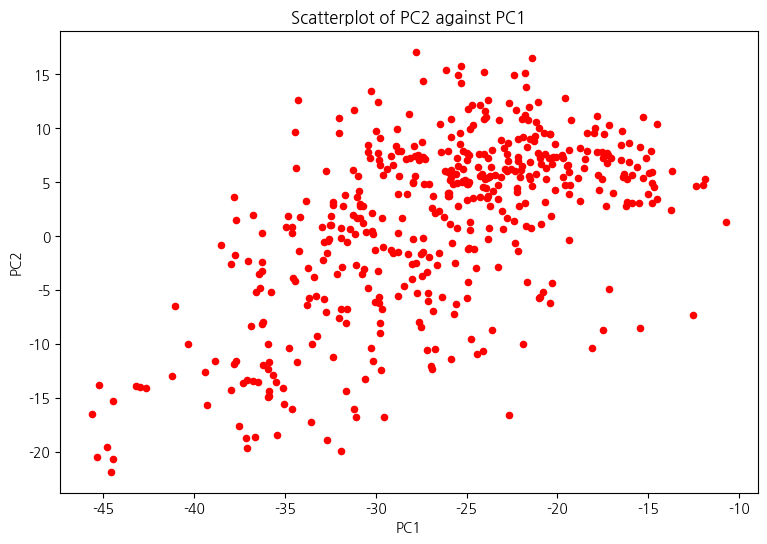

In [189]:
'''
Visualising the PCA in dimension R^2 (PC1 and PC2)
'''

fig, ax = plt.subplots(figsize=(9,6))
pca_df.plot(x="PC1", y="PC2", kind="scatter", marker="o",
    title="Scatterplot of PC2 against PC1", ax=ax, color="r")
plt.show()

---

**20개 주성분 선택**  
카이저-가트맨 규칙(Kaiser-Guttman Criterion)의 고윳값1기준

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

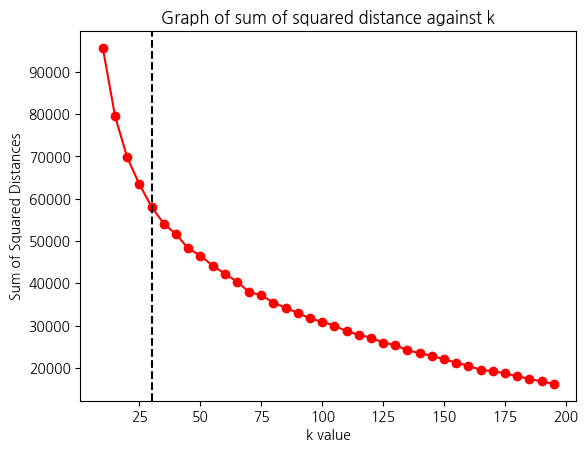

From the graph above, we can see that the optimal k-value is at the elbow, at k = 30


In [190]:
'''Make a pointer to store clustering results'''

cluster_results = {}

'''K-Means Clustering'''

def optimise_k(pca_df):

    error = []
    ks = []
    
    for i in range(10, 200, 5): # For loop from 10 to 200 with intervals of 5 and calculate the respective sum of squared distances for i number of centroids

        # Initialise the KMeans function with the i number of centroids.
        # By default, KMeans function uses the KMeans++ Method of initialisation the centroids.
        kmeans = KMeans(n_clusters=i) 
        
        # Fits the model with pcd_df and applies KMeans algorithm on pca_df.
        kmeans.fit(pca_df)
        
        # Using the attribute ".inertia_" returns the sum of squared distances of datapoints to their closest cluster center.
        # It is appended into error to be plotted as the y-axis.
        error.append(kmeans.inertia_)
        
        # The number of centroids, i, is appended to ks to be plotted as the x-axis.
        ks.append(i)
    
    # Plot graph of "Sum of Squared Distances" against "k value".
    # Using this graph, the optimal number of centroids can be found via the elbow method
    plt.plot(ks, error, marker="o", color="r")
    plt.title("Graph of sum of squared distance against k")
    plt.xlabel("k value")
    plt.ylabel("Sum of Squared Distances")
    plt.axvline(30, color='black', linestyle='--')
    plt.show()

def cluster_kmeans(pca_df, k):

    # Initialise the KMeans function with the k number of centroids.
    kmeans = KMeans(n_clusters=k)

    # Fits the model with pcd_df and applies KMeans algorithm on pca_df.
    kmeans.fit(pca_df)

    # Using the method .predict(X), it calculates the closest cluster each datapoint in dataset X belongs to.
    results = kmeans.predict(pca_df)

    # Plot the cluster results.
    fig, ax = plt.subplots(figsize=(9,6))
    pca_df.plot(x="PC1", y="PC2", kind="scatter", 
        title=f"K-Means Cluster Results, k={k}", c=results, cmap="jet", ax=ax)
    plt.show()
    return results

optimise_k(pca_df)
print(f"From the graph above, we can see that the optimal k-value is at the elbow, at k = 30")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


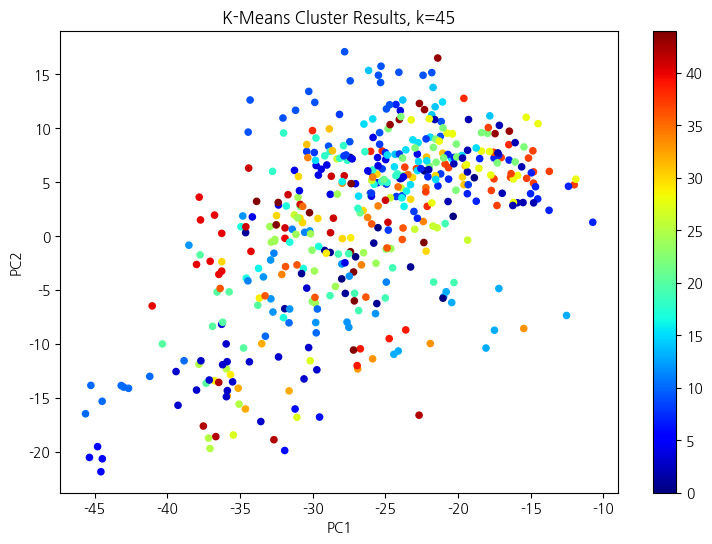

Therefore, we plot the K-Means results for the optimal k-value, 45


In [191]:
'''Plotting the K-Means Cluster Results'''

# K-Means Clustering is applied on pca_df for k = 45
kmeans_results = cluster_kmeans(pca_df,k=45)

# K-Means Clustering results are saved in cluster_results
cluster_results[f"KMeans"] = kmeans_results

print(f"Therefore, we plot the K-Means results for the optimal k-value, 45")

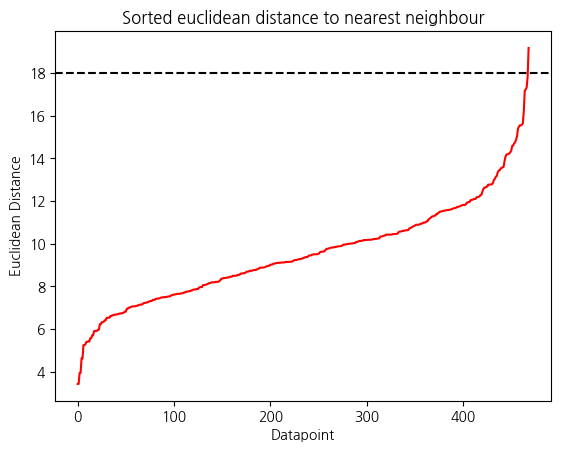

From the graph above, we can see that the optimal epsilon is at the elbow, at epsilon = 18


In [192]:
'''
DBSCAN Clustering:
'''

def optimise_epsilon(pca_df):

    # Initialise the NearestNeighbors function with 2 neighbors 
    # This is to find optimal value of epsilon based on an optimisation algorithm
    neigh = NearestNeighbors(n_neighbors=2)

    # Fits the model with pcd_df
    nbrs = neigh.fit(pca_df)

    # Using the method .kneighbors(X), the k-Neighbours for datatpoints in datatset X are found
    # By default, this method returns the distances array which is found in the 0 index
    distances = nbrs.kneighbors(pca_df)[0]

    # Sort distances row-wise
    distances = np.sort(distances,axis=0) 

    # Remove the 0-index value (Euclidean distance to itself which is 0)
    distances = distances[:,1:]

    # Plot graph of "Euclidean Distance" against "Datapoint".
    # Using this graph, the optimal epsilon value can be found via the elbow method
    plt.plot(distances, color="r")
    plt.title("Sorted euclidean distance to nearest neighbour")
    plt.xlabel("Datapoint")
    plt.ylabel("Euclidean Distance")
    plt.axhline(y=18, color='black', linestyle='--')
    plt.show()    

def cluster_dbscan(pca_df, eps, min_samples):

    # Initialise the DBSCAN function with eps and min_samples.
    # eps is a float value and is the maximum distance between two samples for one to be considered as in the neighborhood of the other
    # min_samples is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
    # This includes the point itself.
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Using the method .fit_predict(X), clusters from a data or distance matrix and predict labels are computed
    results = dbscan.fit_predict(pca_df)
    
    # Plot the cluster results.
    fig, ax = plt.subplots(figsize=(9,6))
    pca_df.plot(x="PC1", y="PC2", kind="scatter", 
        title=f"DBSCAN Cluster Results", c=results, cmap="jet", ax=ax)
    plt.show()

    # Get number of clusters formed.
    num_clusters = np.max(results)
    print(f"For the epsilon value of {eps}, the number of clusters is {num_clusters}")

    return results

optimise_epsilon(pca_df) 
print(f"From the graph above, we can see that the optimal epsilon is at the elbow, at epsilon = 18")

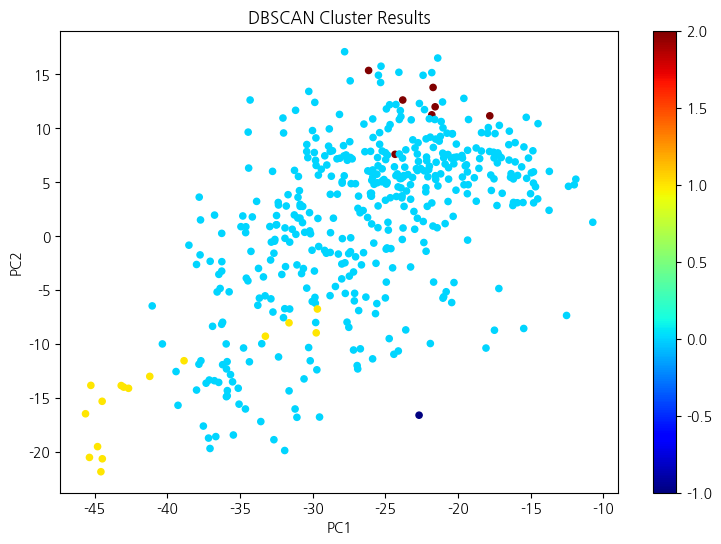

For the epsilon value of 18, the number of clusters is 2


In [193]:
'''Plotting the DBSCAN Cluster Results'''

# DBSCAN Clustering is applied on pca_df for eps = 20 and min_samples = 2
results = cluster_dbscan(pca_df, eps=18, min_samples=2)

# DBSCANS Clustering results are saved in cluster_results, a dict
cluster_results["DBSCAN"] = results

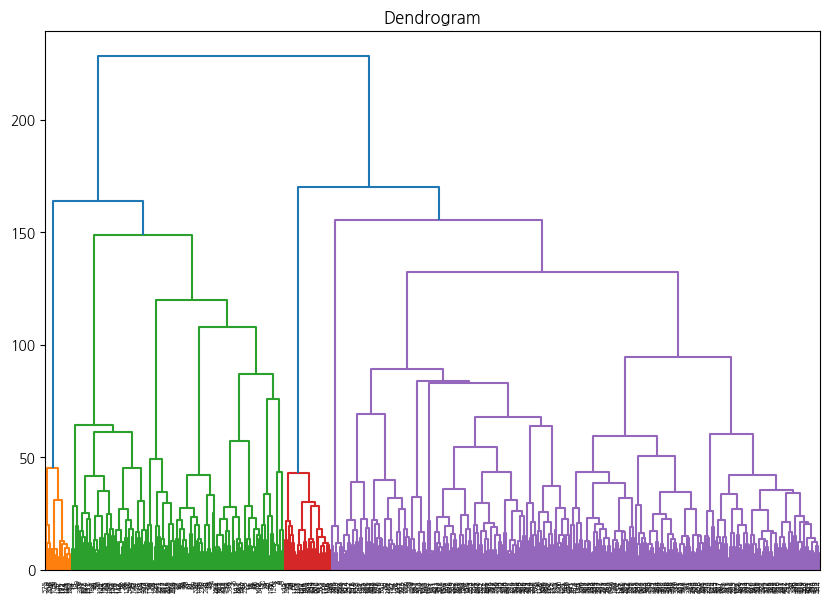

In [194]:
'''
Hierarchical Clustering (AgglomerativeClustering)
'''

def cluster_hierar(pca_df, n):

    # Initialise the AgglomerativeClustering function with n clusters.
    # Fits the model with pca_df and applies Agglomerative Clustering algorithm on pca_df.
    hierar = AgglomerativeClustering(n_clusters=n, ).fit(pca_df)

    # Using the method .fit_predict(X), it fits and return the result of each datapoint's clustering assignment.
    results = hierar.fit_predict(pca_df)

    # Plot cluster results.
    fig, ax = plt.subplots(figsize=(9,6))
    pca_df.plot(x="PC1", y="PC2", kind="scatter", 
        title=f"Agglomerative Clustering Results, n={n}", c=results, cmap="jet", ax=ax)
    plt.show()

    return results

def draw_dendrogram(pca_df):
    
    # Initialise Linkage function with linkage method = "ward".
    # linkage returns a linkage matrix, which is needed for the dendrogram to be plotted.
    linked = linkage(pca_df,method = "ward") 

    # Plot dendrogram results.
    plt.figure(figsize =(10,7))
    plt.title("Dendrogram")
    dendrogram(linked,
                orientation = "top",
                distance_sort = "descreasing",
                show_leaf_counts = True)
    plt.show()

draw_dendrogram(pca_df)

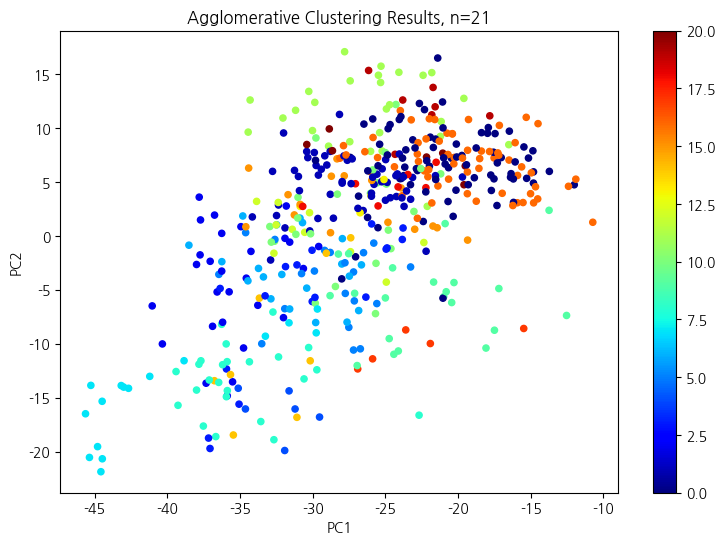

In the case of Hierarchical Clustering, we chose the optimal number of clusters to be sqrt(N)=22, where N is the number of datapoints


In [195]:
'''Plotting the Hierarchical Cluster Results'''
# Hierarchical Clustering is applied on pca_df for n_clusters = sqrt(N)
results = cluster_hierar(pca_df, int(pca_df.shape[0]**0.5)) 

# Hierarchical Clustering results are saved in cluster_results
cluster_results["Hierarchical"] = results

print(f"In the case of Hierarchical Clustering, we chose the optimal number of clusters to be sqrt(N)=22, where N is the number of datapoints")

In [196]:
'''
Cluster Results -> Groupings of stocks/ETFs:
1. First, we need to map the cluster ids to the symbols of our stocks to get groups of stocks
2. Then store the clusters into a pointer -> "groups"
'''
norm_symbols = pca_df.index

# Return array of the symbols of stocks.
print(norm_symbols.shape) 

# Contains cluster group assignments for each algorithm.
print([x.shape for x in cluster_results.values()])

def map_clusters(cluster_result):
    grouping = [[] for _ in range(max(cluster_result)+1)]
    for i, res in enumerate(cluster_result):
        grouping[res].append(norm_symbols[i])
    
    grouping = [g for g in grouping if 1<len(g)<=10] # Keep clusters with <=10 members.
    
    return grouping

groups = {}
for algorithm, cluster_result in cluster_results.items():
    groups[algorithm] = map_clusters(cluster_result)


print("Number of valid clusters:", {k:len(v) for k,v in groups.items()})
print("Example cluster:", groups["Hierarchical"][0])

(469,)
[(469,), (469,), (469,)]
Number of valid clusters: {'KMeans': 28, 'DBSCAN': 1, 'Hierarchical': 8}
Example cluster: ['삼성전자', '현대차', '기아', '삼성SDI', '현대모비스', '삼성전기']


In [197]:
for i in range(0,len(groups["KMeans"])):
    print("Example cluster:", groups["KMeans"][i])

Example cluster: ['KG모빌리티', '세아베스틸지주', '제주은행', 'LS네트웍스', 'GS글로벌', '신원', '한신공영', '일성건설']
Example cluster: ['CJ', '제일기획', '오뚜기', '오리온홀딩스', '대상', '빙그레', '삼양홀딩스', '한섬', 'SBS']
Example cluster: ['미래에셋증권', 'NH투자증권', '삼성증권', '대신증권']
Example cluster: ['현대차', '기아', '현대모비스']
Example cluster: ['에스엘', '화신', '서연', '에스제이지세종', '디와이']
Example cluster: ['아모레G', '롯데지주', '농심', '롯데칠성', '영풍', '퍼시스', '한일홀딩스', '신도리코', '남양유업']
Example cluster: ['동원산업', '사조대림', '사조산업', '신라교역', '사조오양', '한성기업', '동원수산']
Example cluster: ['세아제강지주', '극동유화', '한국특강', '한일철강', '부국철강']
Example cluster: ['SK하이닉스', '카카오', '동원시스템즈', '디아이', '신성이엔지', '와이투솔루션', '콤텍시스템', '미래산업']
Example cluster: ['DN오토모티브', '태광산업', '고려제강', '아세아', 'KISCO홀딩스', 'CR홀딩스', '대한제분', 'KPX케미칼', '하이트진로홀딩스', '경방']
Example cluster: ['대한항공', 'LS ELECTRIC', '호텔신라', '롯데정밀화학', '아시아나항공', 'SK디스커버리', '한진', '코오롱', '한솔홀딩스']
Example cluster: ['삼화콘덴서', '삼화전기', '삼화전자', '성문전자']
Example cluster: ['쌍용C&E', '한일현대시멘트', '성신양회']
Example cluster: ['삼성E&A', '현대건설', 'GS건설', 'DL', 'HDC']
Example

In [198]:
for i in range(0,len(groups["Hierarchical"])):
    print("Example cluster:", groups["Hierarchical"][i])

Example cluster: ['삼성전자', '현대차', '기아', '삼성SDI', '현대모비스', '삼성전기']
Example cluster: ['에스엘', '화신', '대원강업', '모토닉', '서연', '에스제이지세종', '한국무브넥스', '인지컨트롤스', '화승코퍼레이션', '유성기업']
Example cluster: ['삼화콘덴서', '삼화전기', '삼화전자', '성문전자']
Example cluster: ['삼성화재', '기업은행', 'DB손해보험', '현대해상', '코리안리', '롯데손해보험', '한화손해보험', '흥국화재']
Example cluster: ['한국전력', 'KT&G', 'SK텔레콤', 'KT', '한국가스공사']
Example cluster: ['HLB글로벌', '휴스틸', 'NI스틸', '광명전기', '동양철관', '대양금속', '문배철강']
Example cluster: ['동원산업', '사조대림', '사조산업', '신라교역', '사조오양', '한성기업', '동원수산']
Example cluster: ['DI동일', 'BYC', '만호제강', '대한화섬', '성창기업지주', '방림', '대한방직']


In [199]:
for i in range(0,len(groups["DBSCAN"])):
    print("Example cluster:", groups["DBSCAN"][i])

Example cluster: ['S-Oil', '동원산업', '사조대림', '사조산업', '신라교역', '사조오양', '한성기업', '동원수산']


In [200]:
cumulative_log_returns = log_return_data.cumsum()
cumulative_returns = np.exp(cumulative_log_returns) - 1

In [201]:
def clusterCumsumPlot(name_clustering_algorithm):
    for i in range(0, len(groups[name_clustering_algorithm])):
        plt.figure(figsize=(10, 6))
        cluster = groups[name_clustering_algorithm][i]
        for stock in cluster:
            if stock in cumulative_returns.columns:
                cumulative_returns[stock].plot(label=stock)
        plt.title(f'{name_clustering_algorithm} 군집화 알고리즘 - {i+1}번째 군집')
        plt.xlabel('날짜')
        plt.ylabel('누적수익률')
        plt.legend()
        plt.grid(True)
        plt.show()

In [202]:
#clusterCumsumPlot("DBSCAN")

In [203]:
#clusterCumsumPlot("KMeans")

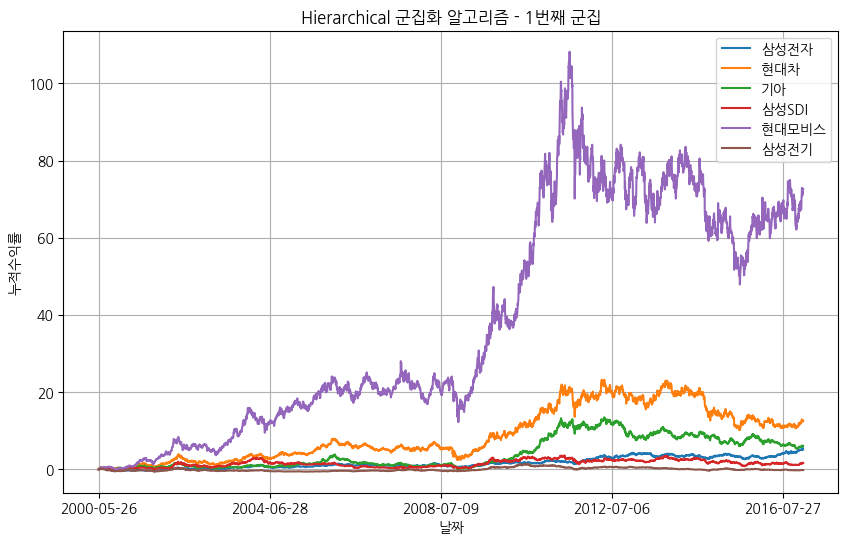

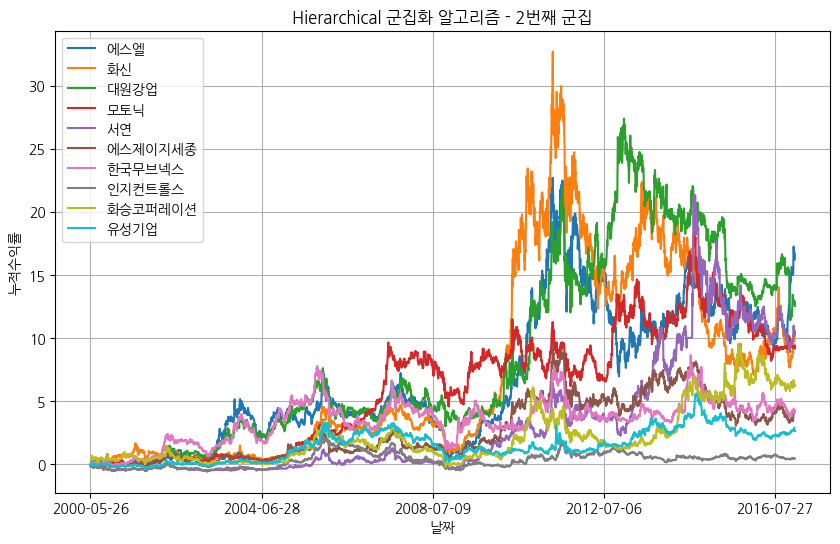

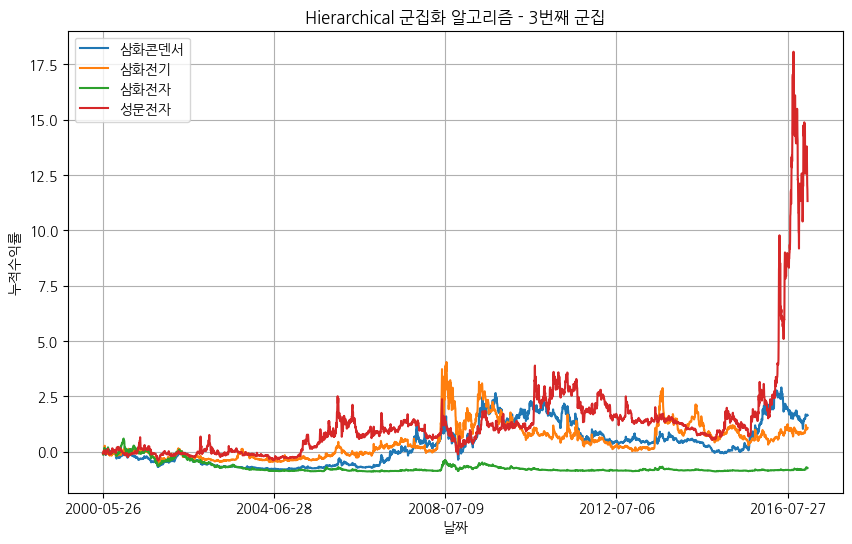

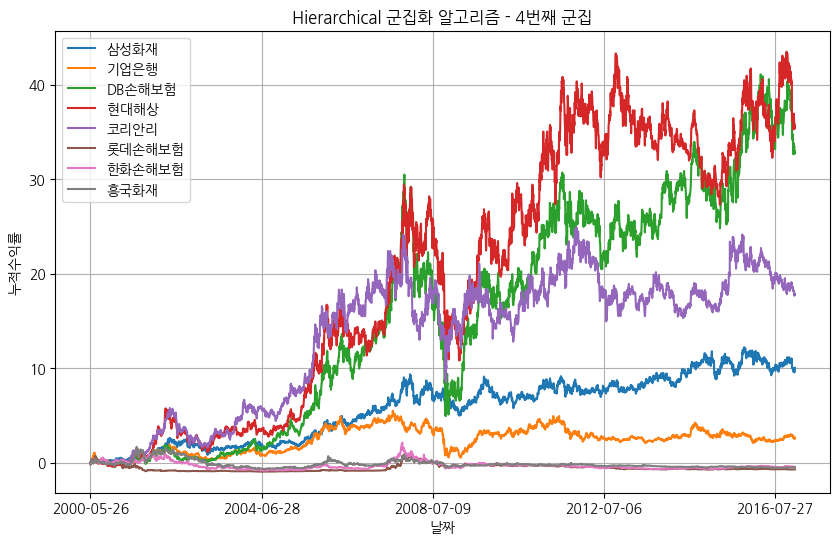

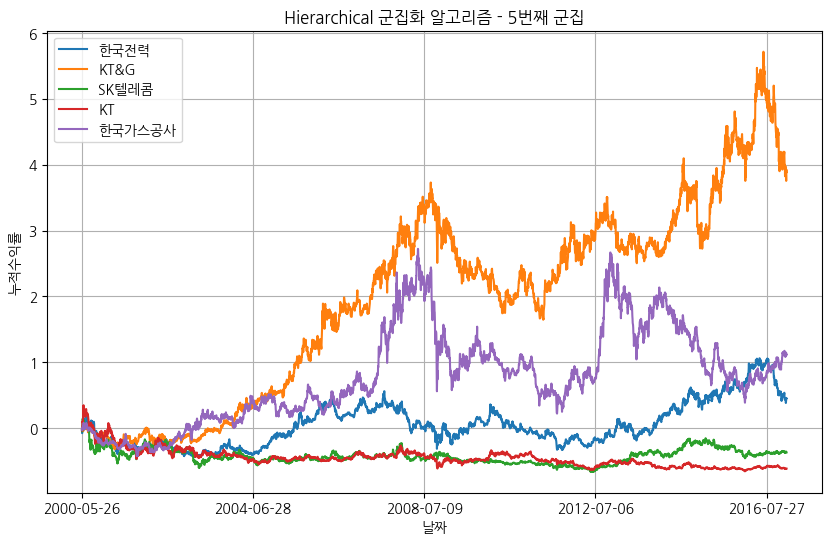

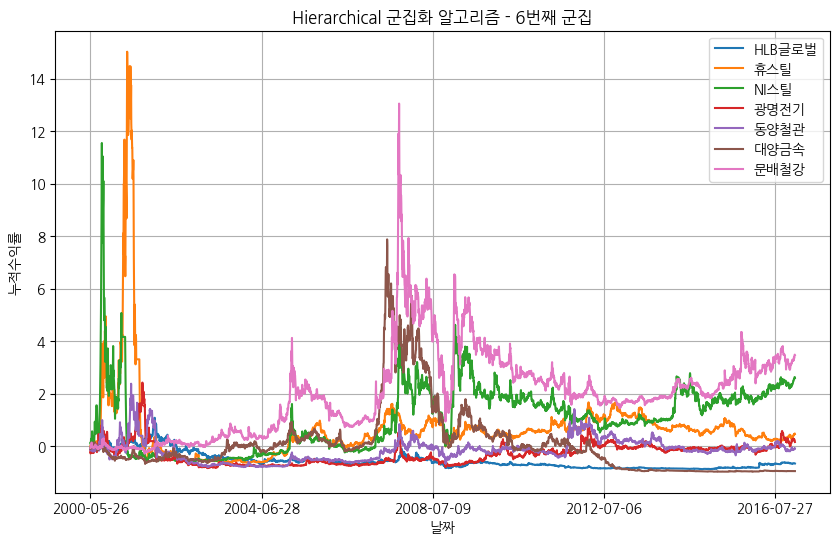

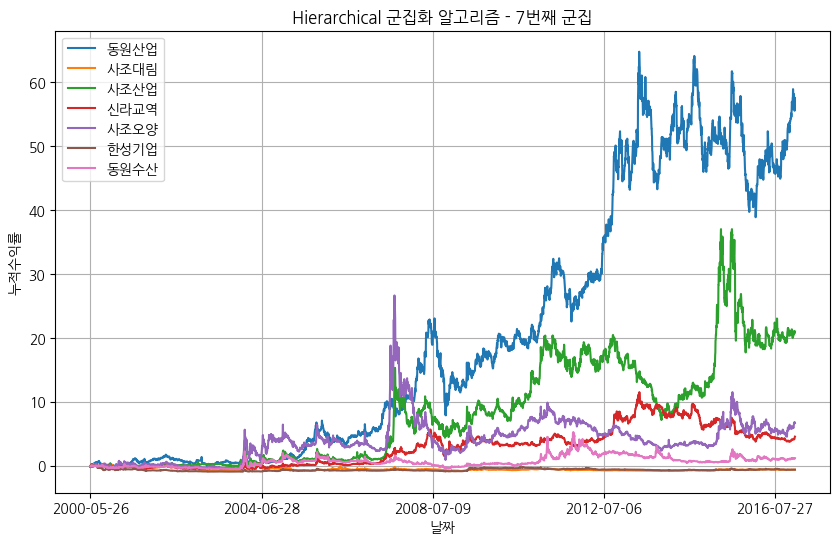

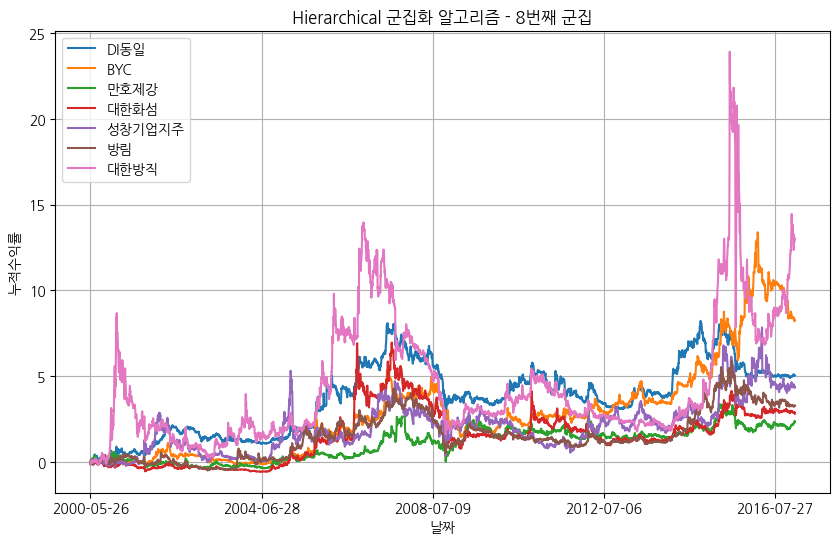

In [204]:
clusterCumsumPlot("Hierarchical")

## 4. Validation

In [205]:
val_log_returns = np.log(val_data / val_data.shift(1))
val_log_returns = val_log_returns.dropna(axis=0)

In [206]:
val_log_returns 

,삼성전자,SK하이닉스,현대차,기아,POSCO홀딩스,삼성SDI,카카오,현대모비스,삼성화재,한국전력,...,비비안,에넥스,카프로,동원수산,한국주강,금호전기,한솔PNS,한창,SHD,일정실업
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2012-06-07,0.050254,0.040730,0.027457,0.015484,0.020762,0.013245,0.016982,0.012832,-0.004739,0.006244,...,-0.020100,0.018692,0.025080,0.025425,0.070708,0.014504,0.000000,0.024752,0.004028,0.000000
2012-06-08,-0.014331,-0.036121,-0.014691,-0.014185,0.014956,-0.016584,-0.029937,-0.025832,-0.021609,0.000000,...,0.000000,0.139762,0.000000,0.012474,-0.012999,0.002911,-0.004405,-0.081983,0.000000,0.000000
2012-06-11,0.016700,0.058052,0.014691,0.011621,0.013405,0.032898,0.028891,0.003731,-0.024571,0.002073,...,0.002575,0.139552,0.039459,-0.004141,0.049235,0.019969,0.005504,0.016052,0.008098,0.000000
2012-06-12,-0.010305,0.021460,-0.006270,0.002564,-0.018818,0.009662,0.048384,-0.003731,-0.017566,-0.014599,...,-0.004187,0.062435,-0.018019,0.004141,-0.049235,-0.011346,0.003288,0.139485,0.000000,-0.003422
2012-06-13,0.012668,0.004237,0.000000,-0.001281,-0.001358,0.006390,-0.013153,0.018519,0.020051,-0.002103,...,0.001613,-0.017253,-0.012195,0.000000,0.045670,0.011346,0.008715,-0.037250,0.016002,0.023771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-01,0.031241,-0.006993,-0.010811,-0.003221,0.004796,0.039221,-0.042755,0.000000,0.001797,-0.040557,...,0.000000,0.008759,-0.007435,0.003079,0.007639,0.013095,0.261331,-0.009651,0.002862,0.000000
2016-06-02,0.023722,-0.015915,0.000000,-0.009725,-0.016888,0.008511,-0.010179,0.000000,0.028320,-0.009983,...,-0.001052,-0.008759,-0.021371,-0.021751,-0.016885,0.038203,-0.062645,-0.027260,-0.017494,0.024409
2016-06-03,0.008753,-0.016173,0.003617,0.000000,-0.012240,-0.056660,0.005128,0.000000,-0.015831,0.005004,...,-0.002372,-0.007358,0.011371,-0.022235,-0.006211,-0.004211,-0.047416,-0.020132,-0.008830,0.000000


In [207]:
val_log_returns[groups["KMeans"][0]]

,KG모빌리티,세아베스틸지주,제주은행,LS네트웍스,GS글로벌,신원,한신공영,일성건설
Symbol Name,,,,,,,,
2012-06-07,0.012691,0.007682,0.061948,0.013342,0.008252,0.022884,-0.064967,-0.010194
2012-06-08,0.005417,-0.028462,-0.020157,0.000000,-0.025080,0.000000,0.050745,-0.008230
2012-06-11,0.031753,0.047414,-0.035378,0.013166,0.037274,0.013483,-0.027725,0.008230
2012-06-12,0.001719,-0.006277,0.003191,-0.005963,0.000000,0.000000,-0.009415,0.010194
2012-06-13,-0.008697,0.015000,-0.001063,0.000000,-0.008151,-0.027151,0.012089,0.000000
...,...,...,...,...,...,...,...,...
2016-06-01,-0.009920,-0.005900,0.032503,-0.007210,0.063870,0.015424,0.002395,-0.001020
2016-06-02,-0.015799,-0.007921,0.013215,-0.001448,-0.020271,0.040005,-0.019324,0.017198
2016-06-03,0.020054,0.021633,-0.005318,-0.007273,-0.018950,-0.009852,-0.002442,-0.009068


In [208]:
def get_r_squared(group):
    df = val_log_returns[group]
    corr = df.corr() # Correlation matrix
    corr.values[np.tril_indices_from(corr)] = np.nan # Keep only upper triangular of the correlation matrix
    return corr.unstack().mean() # Return mean of the correlation matrix


def average_correlation(groups):
    avg_corr = {}
    for algorithm, cluster_result in groups.items():
        corrs = []
        for group in cluster_result:
            corr = get_r_squared(group)
            corrs.append(corr)
        avg_corr[algorithm] = np.mean(np.square(corrs)) # Take mean of r-squared 
    return avg_corr

corr_metrics = average_correlation(groups)
pd.DataFrame(corr_metrics.items(), columns=["Algorithm", "R-Squared"])

,Algorithm,R-Squared
0,KMeans,0.075281
1,DBSCAN,0.029420
2,Hierarchical,0.049294


In [209]:
from sklearn.metrics import silhouette_score

def prepare_labels(data, groups):
    # Prepare a mapping from stock names to their positions to align labels
    stock_indices = {stock: index for index, stock in enumerate(data.columns)}
    
    # Prepare labels for each algorithm
    prepared_labels = {}
    for algorithm, clusters in groups.items():
        labels = [-1] * len(data.columns)  # Initialize with -1 for any potentially unassigned stocks
        for cluster_index, stocks in enumerate(clusters):
            for stock in stocks:
                if stock in stock_indices:
                    labels[stock_indices[stock]] = cluster_index
        prepared_labels[algorithm] = labels
    return prepared_labels

def calculate_silhouette_scores(data, groups):
    prepared_labels = prepare_labels(data, groups)
    silhouette_scores = {}
    for algorithm, labels in prepared_labels.items():
        # Check if labels have been properly assigned (avoid all -1 scenario)
        if len(set(labels)) > 1:
            score = silhouette_score(data.T, labels)  # Transpose to align samples with features
            silhouette_scores[algorithm] = score
        else:
            silhouette_scores[algorithm] = None  # No valid scoring if all labels are -1
    return silhouette_scores

# Assuming `groups` contains your cluster data as previously formatted
silhouette_scores = calculate_silhouette_scores(val_log_returns, groups)

# Display the results in a DataFrame
import pandas as pd
results_df = pd.DataFrame(silhouette_scores.items(), columns=["Algorithm", "Silhouette Score"])
print(results_df)


      Algorithm  Silhouette Score
0        KMeans         -0.156104
1        DBSCAN         -0.030036
2  Hierarchical         -0.155267


In [210]:
import json
with open('new_1.json', 'w', encoding='utf-8') as f:
    json.dump(groups, f, ensure_ascii=False, indent=4)